In [69]:
import pandas as pd
from utils import plot_pacfs ,plot_acfs

In [70]:
df = pd.read_csv("all_coins_data.csv")
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversion_type,conversion_symbol,coin,daily_return_pct,intraday_return,daily_log_return
0,2020-08-22,0.1262,0.1183,0.1229,84207229.64,10373929.94,0.1253,direct,NaN,ADA,0.019528,0.019528,0.019340
1,2020-08-23,0.1259,0.1195,0.1253,64772529.12,7945897.18,0.1215,direct,NaN,ADA,-0.030327,-0.030327,-0.030797
2,2020-08-24,0.1270,0.1201,0.1215,77809944.45,9662533.63,0.1237,direct,NaN,ADA,0.018107,0.018107,0.017945
3,2020-08-25,0.1238,0.1063,0.1237,65939158.71,7699604.99,0.1126,direct,NaN,ADA,-0.089733,-0.089733,-0.094018
4,2020-08-26,0.1183,0.1107,0.1126,21686624.36,2483949.36,0.1144,direct,NaN,ADA,0.015986,0.015986,0.015859


### Descriptive statistics

In [71]:
descriptive_stats = df.groupby("coin").agg({"daily_log_return":["min","max","mean","std", "skew"]})
descriptive_stats = descriptive_stats.stack(1).reset_index().pivot(index = "coin", columns = "level_1", values = "daily_log_return").reset_index()
descriptive_stats.head()

level_1,coin,max,mean,min,skew,std
0,ADA,0.286903,0.009012,-0.198633,0.599271,0.067341
1,ALGO,0.327569,0.003059,-0.281596,0.221130,0.070642
2,ATOM,0.287791,0.005095,-0.289036,0.350164,0.072735
3,BCH,0.275018,0.004318,-0.229311,0.008350,0.060844
4,BNB,0.533253,0.012792,-0.270315,1.689057,0.073821


In [72]:
kurtosis = df[["coin", "daily_log_return"]].groupby("coin").apply(pd.DataFrame.kurt).reset_index().rename(columns = {"daily_log_return":"kurtosis"})
kurtosis.head()

,coin,kurtosis
0,ADA,2.150146
1,ALGO,2.227885
2,ATOM,2.229412
3,BCH,3.892785
4,BNB,11.368705


In [73]:
descriptive_stats = descriptive_stats.merge(kurtosis, on = "coin", how = "left")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
descriptive_stats.set_index("coin")

In [3]:
df.sort_values(["coin", "time"], inplace = True)
df = df[["time","close", "coin"]]

In [4]:
coins = df["coin"].drop_duplicates().tolist()

### Autocorrelation plots

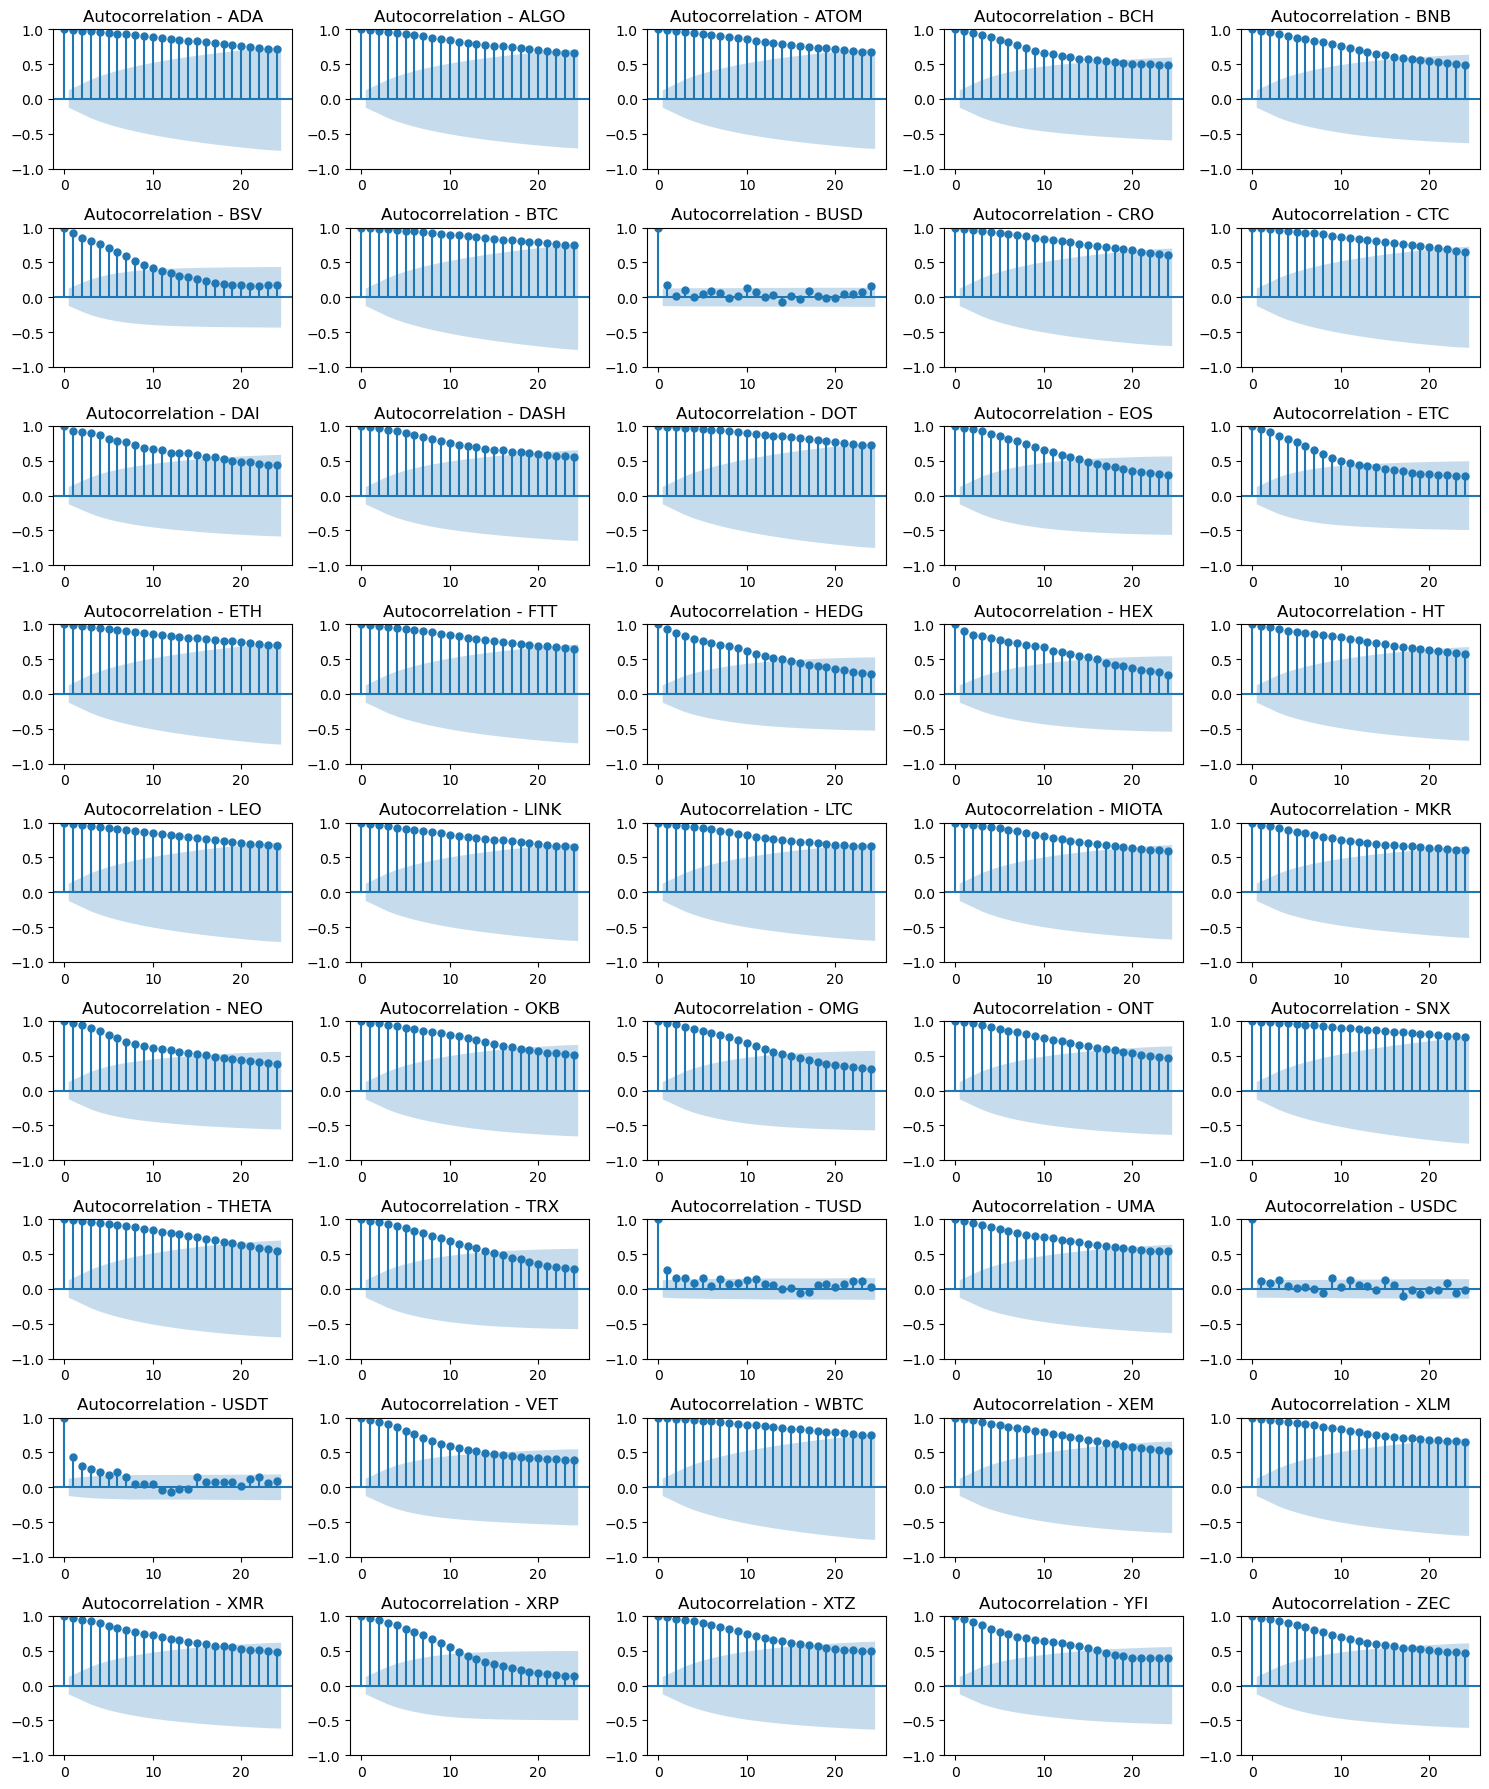

In [11]:
plot_acfs(df, coins, 9,5)

### Partial Autocorrelation plots

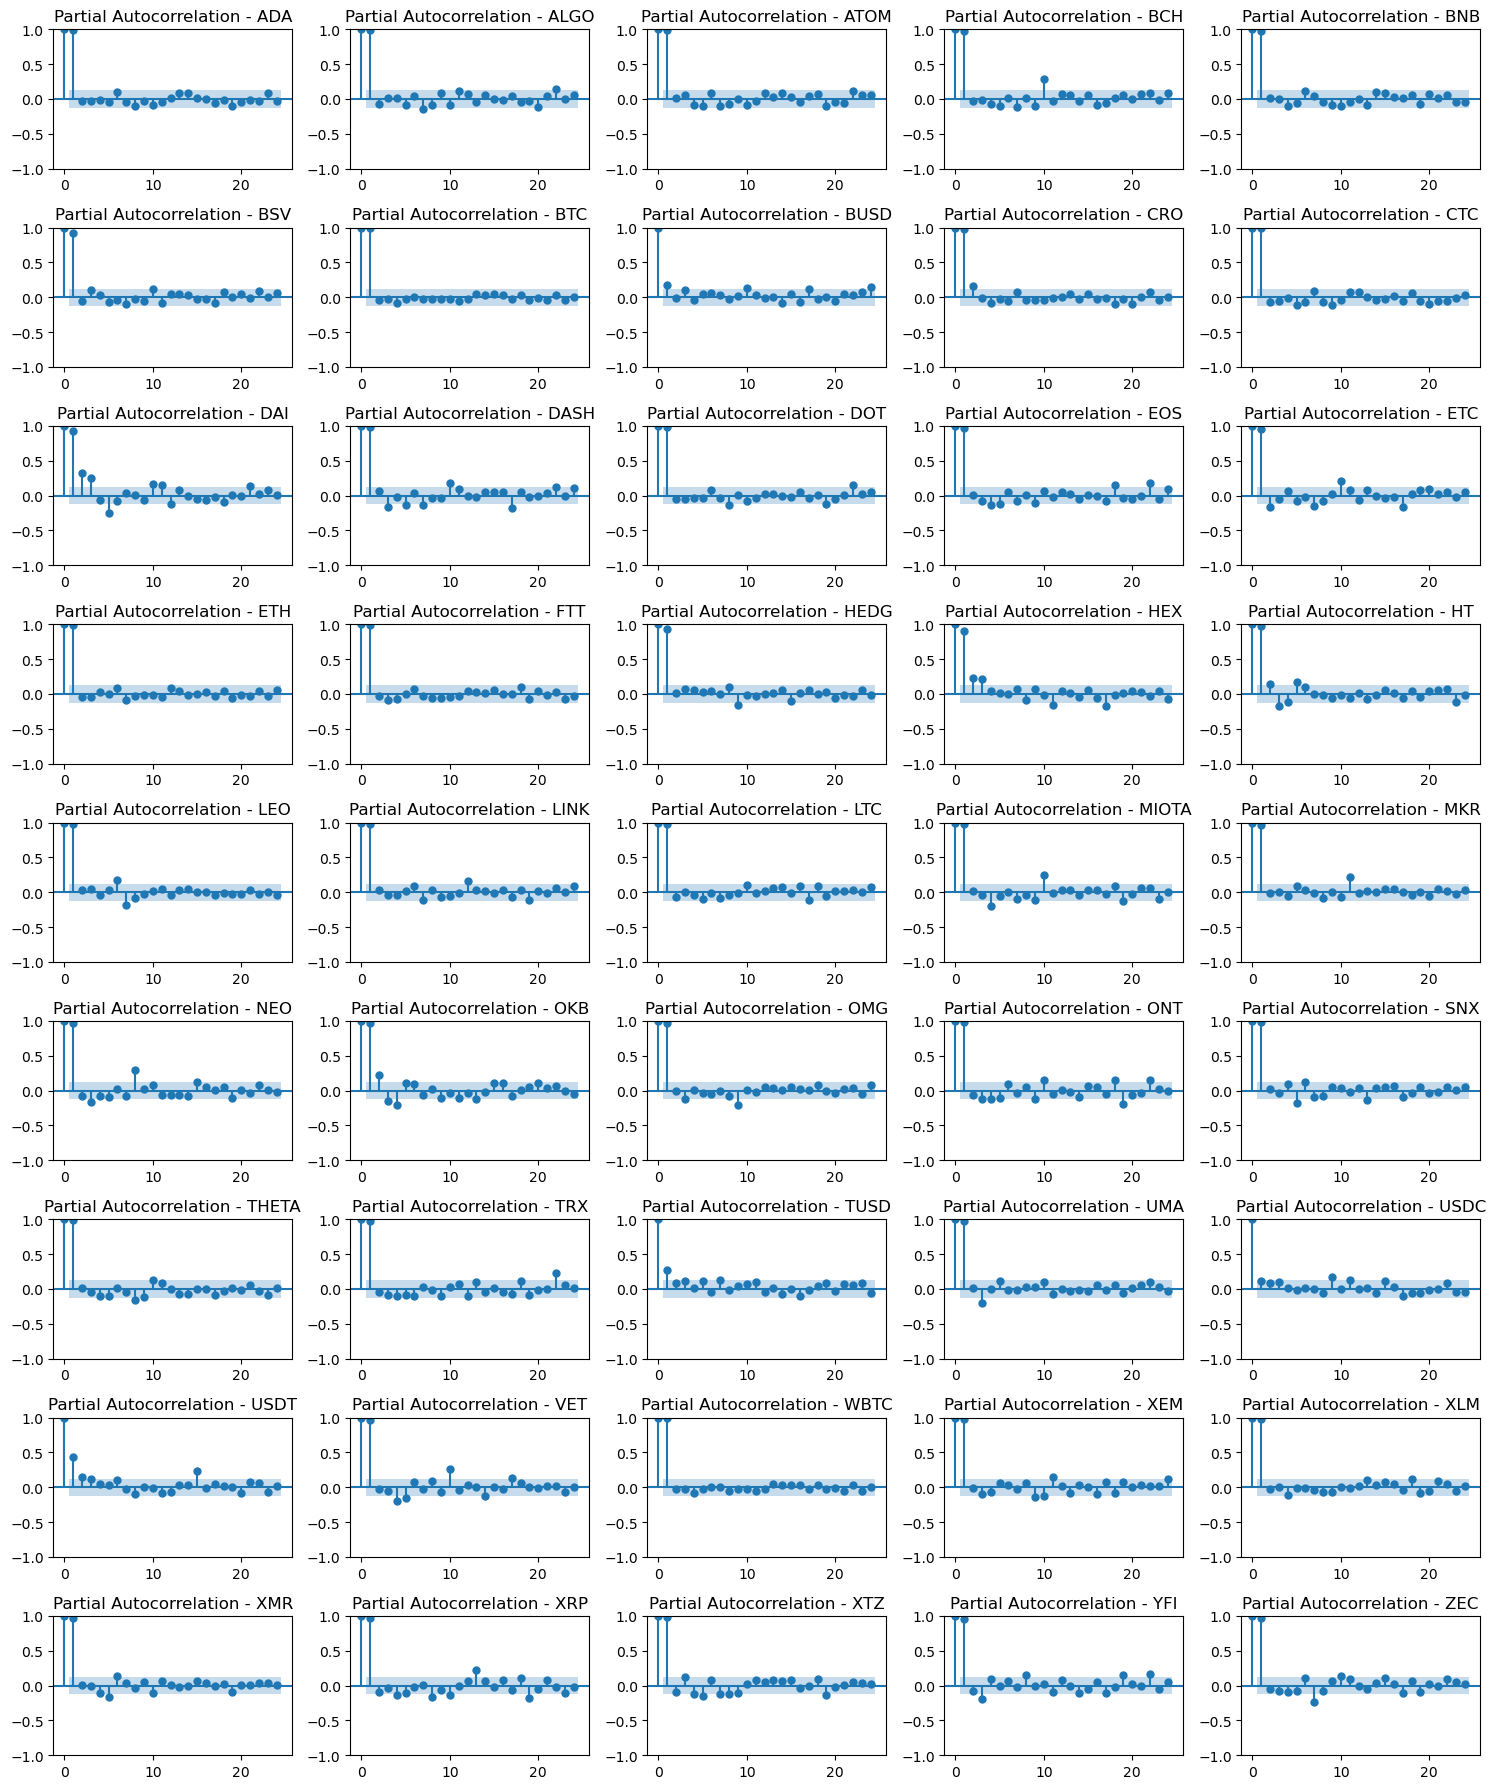

In [12]:
plot_pacfs(df, coins, 9,5)